<a href="https://colab.research.google.com/github/OrugboGodswill/OIBSIP/blob/main/Sale_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
## Import all Dependency
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [8]:
# Drop the 'Unnamed: 0' Colunms
df = df.drop('Unnamed: 0', axis=1)
df.to_csv('Advertising_1.csv', index=False)

In [9]:
# No missing Values.
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
df.TV.value_counts()

199.8    2
109.8    2
17.2     2
177.0    2
222.4    2
        ..
139.3    1
216.8    1
199.1    1
26.8     1
232.1    1
Name: TV, Length: 190, dtype: int64

In [11]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [12]:
# Feature Selection
# Y is the dependent variable
# X is the independent variable
## Preparing the data for Modelling

X = df.iloc[:, 0:3]
y = df['Sales']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection and Training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on the testing set
y_prediction = model.predict(X_test)

In [13]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [14]:
y_prediction = model.predict(X_test)
y_prediction

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [15]:
# Model Evaluation
mse = mean_squared_error(y_test, y_prediction)
r2 = r2_score(y_test, y_prediction)
print("Mean Square Error is :", mse)
print("R-Squared score is :",r2)

Mean Square Error is : 3.1740973539761033
R-Squared score is : 0.899438024100912


In [17]:
## Actual and Prediction
a_p = pd.DataFrame({'Actual':y_test.values.flatten(), 'Predict':y_prediction.flatten()})
a_p

,Actual,Predict
0,16.9,16.408024
1,22.4,20.889882
2,21.4,21.553843
3,7.3,10.608503
4,24.7,22.112373
5,12.6,13.105592
6,22.3,21.057192
7,8.4,7.461010
8,11.5,13.606346
9,14.9,15.155070


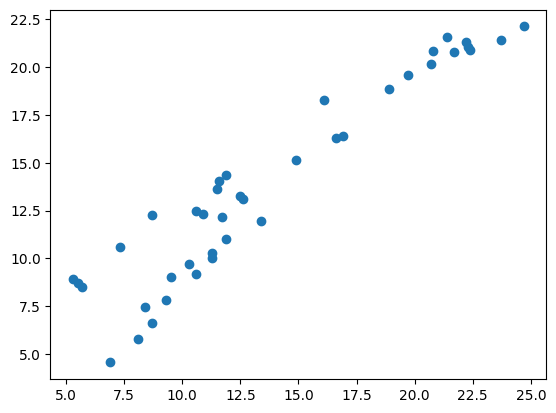

In [18]:
# Actual and Predicted Visualization
plt.scatter (y_test, y_prediction)